In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('max_colwidth', 2000)
pd.options.display.max_rows = 200

In [2]:
js=pd.read_json('vehicle.json')

print('js length:', len(js))
print('js type:', type(js))
js.tail()

js length: 372
js type: <class 'pandas.core.frame.DataFrame'>


,URL_Vehicle,Title,Price,SubLoc,AttribDictionary
367,https://houston.craigslist.org/cto/d/sugar-land-2008-honda-accord/7011134288.html,2008 HONDA ACCORD,$8450,(SUGAR LAND),"{'0': '<span><b>2008 HONDA ACCORD</b></span>', '1': '<span>condition: <b>excellent</b></span>', '2': '<span>cylinders: <b>4 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>94044</b></span>', '6': '<span>paint color: <b>silver</b></span>', '7': '<span>size: <b>full-size</b></span>', '8': '<span>title status: <b>clean</b></span>', '9': '<span>transmission: <b>automatic</b></span>', '10': '<span>type: <b>sedan</b></span>'}"
368,https://houston.craigslist.org/cto/d/houston-2006-honda-civic/7011212533.html,2006 Honda Civic,$2000,"(Houston, TX)","{'0': '<span><b>2004 honda civic</b></span>', '1': '<span>condition: <b>salvage</b></span>', '2': '<span>cylinders: <b>4 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>86000</b></span>', '6': '<span>paint color: <b>blue</b></span>', '7': '<span>size: <b>compact</b></span>', '8': '<span>title status: <b>salvage</b></span>', '9': '<span>transmission: <b>automatic</b></span>', '10': '<span>type: <b>sedan</b></span>'}"
369,https://houston.craigslist.org/cto/d/houston-2003-honda-civic-lx-reliable/7011225562.html,2003 honda civic LX RELIABLE,$3100,(Humble),"{'0': '<span><b>2003 honda civic</b></span>', '1': '<span>fuel: <b>gas</b></span>', '2': '<span>title status: <b>clean</b></span>', '3': '<span>transmission: <b>automatic</b></span>'}"
370,https://houston.craigslist.org/cto/d/houston-2009-honda-odyssey-ex/7011303286.html,2009 Honda Odyssey EX,$6499,(Houston/Katy),"{'0': '<span><b>2009 Honda Odyssey EX</b></span>', '1': '<span>condition: <b>excellent</b></span>', '2': '<span>cylinders: <b>6 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>92000</b></span>', '6': '<span>title status: <b>clean</b></span>', '7': '<span>transmission: <b>automatic</b></span>'}"
371,https://houston.craigslist.org/cto/d/houston-honda-accord-for-sale/7011340599.html,Honda Accord For Sale,$1,None,"{'0': '<span><b>2010 honda accord</b></span>', '1': '<span>fuel: <b>gas</b></span>', '2': '<span>title status: <b>clean</b></span>', '3': '<span>transmission: <b>automatic</b></span>'}"


In [3]:
js['Price'].str[1:]

0       5000
1      12700
2       1500
3       3850
4       4300
       ...  
367     8450
368     2000
369     3100
370     6499
371        1
Name: Price, Length: 372, dtype: object

In [4]:
#Remove '$' from price and cast as float
js['Price'] = js['Price'].str[1:]
js['Price'] = js['Price'].astype('float')
js.dtypes

URL_Vehicle          object
Title                object
Price               float64
SubLoc               object
AttribDictionary     object
dtype: object

In [5]:
js['AttribDictionary'][0:2]

0                 {'0': '<span><b>2007 honda cr-v</b></span>', '1': '<span>condition: <b>excellent</b></span>', '2': '<span>cylinders: <b>4 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>116000</b></span>', '6': '<span>paint color: <b>black</b></span>', '7': '<span>size: <b>mid-size</b></span>', '8': '<span>title status: <b>clean</b></span>', '9': '<span>transmission: <b>automatic</b></span>', '10': '<span>type: <b>SUV</b></span>'}
1    {'0': '<span><b>2017 honda civic ex sedan</b></span>', '1': '<span>condition: <b>like new</b></span>', '2': '<span>cylinders: <b>4 cylinders</b></span>', '3': '<span>drive: <b>fwd</b></span>', '4': '<span>fuel: <b>gas</b></span>', '5': '<span>odometer: <b>34000</b></span>', '6': '<span>paint color: <b>black</b></span>', '7': '<span>size: <b>full-size</b></span>', '8': '<span>title status: <b>rebuilt</b></span>', '9': '<span>transmission: <b>automatic</b></span>', '10': '<span>

In [6]:
js['AttribDictionary'][0]['0']

'<span><b>2007 honda cr-v</b></span>'

In [8]:
js['AttribDictionary'][371]['0']

'<span><b>2010 honda accord</b></span>'

Price Histogram:


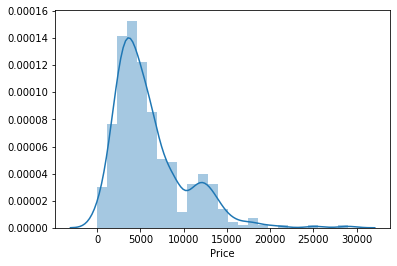

In [9]:
print('Price Histogram:')
sns.distplot(js['Price'])
plt.show()

In [10]:
from scipy import stats
from scipy.stats import norm

def normalize_feature(df, bad_feature):

    #Make histogram & normal probability plot
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3),constrained_layout=True)
    sns.distplot(df[bad_feature], color='r', fit=stats.norm, ax=ax1)
    ax1.set_title(f'{bad_feature} Histogram - Not Normal Distribution')
    res=stats.probplot(df[bad_feature], dist='norm', plot=ax2)
    ax2.set_title('Fit to Normal Distribution')

    #Normalize with log (x+1).  Log of skewed feature: log e(feature+1)=normFeat
    #Exponential equation to undo normpr: e^normFeat-1=feature
    log_feat=np.log(df[bad_feature]+1)
        
    #Plots after normalization
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,3),constrained_layout=True)
    sns.distplot(log_feat, color='g', fit=norm, ax=ax1)
    ax1.set_title(bad_feature+' Histogram - Normal Distribution')
    res=stats.probplot(log_feat, dist='norm', plot=ax2)
    ax2.set_title('Fit to Normal Distribution')
    return log_feat

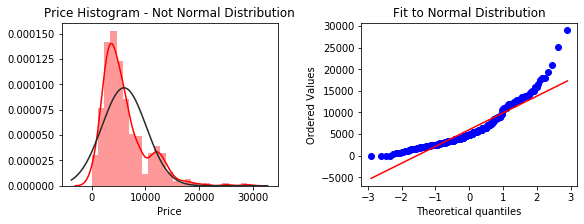

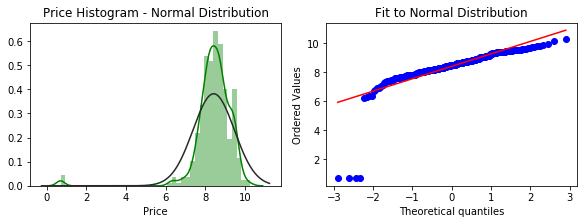

In [11]:
js['ln_Price'] = normalize_feature(df=js, bad_feature='Price')